# estimation of attraction coefficient
Tim Tyree<br>
10.7.2022

In [1]:
from IPython.display import clear_output
clear_output(wait=True)

import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *

os.chdir(nb_dir)
from lib import *

# import cupy, cudf
# from lib.rapids_func import *

import seaborn as sns
import matplotlib.ticker as mtick

from lib.model.attraction_sim_anneal_fit import comp_square_error_msr_aff_osc_period_fixed
import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
# !pwd

In [3]:
# from scipy.optimize import minimize
from scipy.optimize import dual_annealing

In [4]:
plt.close()
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

In [5]:
from lib.model import comp_square_error_msr_aff_osc_period_fixed_with_msr_offset

# define module

# TODO: back of envelop estimation of amax

In [6]:
#TODO: dev run #30 (L=5) (and #31 (L=10)) using the following:
###########################
# mean min lifetime: Gamma
###########################
tscale=1e-3 #s per ms
lifetime_fk= 105.3 # (1.6) ms
lifetime_lr= 33.37 # (73) ms
Gamma_fk = lifetime_fk*tscale
Gamma_lr = lifetime_lr*tscale

###########################
# rms range: Gamma
###########################
R_rms_fk = 0.67 # ± 0.06 cm
R_rms_lr = 0.86 # ± 0.07 cm

######################################################
# max attraction coefficient: amax (Method 1, b.o.e.)
######################################################
mean_squared_distance_fk = R_rms_fk**2
mean_squared_distance_lr = R_rms_lr**2
alinear_boe_fk = (mean_squared_distance_fk / Gamma_fk) / 4
alinear_boe_lr = (mean_squared_distance_lr / Gamma_lr) / 4
alinear_boe_fk,alinear_boe_lr

(1.0657644824311492, 5.540905004495055)

In [7]:
############################
# mean rotational period: T
############################
# #src: http://localhost:8889/notebooks/computing%20rotational%20period%20of%20mean%20fortranic%20spiral%20trajectories.ipynb
# - LR: mean number of loops per particle lifetime: 0.3438
# - FK: mean number of loops per particle lifetime: 0.4976
# - FK(backup, failing ^that): mean number of loops per particle lifetime (at least 1 loop): 0.9131
T_fk = Gamma_fk / 0.4976 #0.9131
T_lr = Gamma_lr / 0.3438
print(f"{T_fk=:.4f} s")
print(f"{T_lr=:.4f} s")

T_fk=0.2116 s
T_lr=0.0971 s


In [8]:
#print back of envelope estimates for alinear for each of the estimates of the mean squared distance between spiral tips
######################################################
# max attraction coefficient: amax (Method 1, b.o.e.)
######################################################

mean_squared_distance_fk =  0.9022**2
mean_squared_distance_lr = 1.0733**2
# mean_squared_distance_fk =  0.5263**2
# mean_squared_distance_lr = 0.6635**2
# mean_squared_distance_fk =  1.1521
# mean_squared_distance_lr = 1.6040
# mean_squared_distance_fk = R_rms_fk**2
# mean_squared_distance_lr = R_rms_lr**2
alinear_boe_fk = (mean_squared_distance_fk / Gamma_fk) / 4
alinear_boe_lr = (mean_squared_distance_lr / Gamma_lr) / 4
print(f"{alinear_boe_fk=:.4f} cm^2/s")
print(f"{alinear_boe_lr=:.4f} cm^2/s")

alinear_boe_fk=1.9325 cm^2/s
alinear_boe_lr=8.6303 cm^2/s


# TODO(later): estimate alinear for fixed period

In [9]:
#####################
# Fenton-Karma
#####################
range_data_dir_lst=[
    '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl',
    '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl',    
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl',
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl',    
]

# #####################
# # Luo-Rudy
# #####################
#runtime ~13 minutes
# range_data_dir_lst=[
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl',
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/250x250/tippos_per_c_001_annihilation_range_timeseries.pkl',
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/300x300/tippos_per_c_001_annihilation_range_timeseries.pkl',
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/350x350/tippos_per_c_001_annihilation_range_timeseries.pkl',
#     '/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/400x400/tippos_per_c_001_annihilation_range_timeseries.pkl',
#     #'/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/500x500/tippos_per_001_annihilation_range_timeseries.pkl',
#     #^this one is too big to track in a reasonable amount of time...     
# ]
for fn in range_data_dir_lst:
    print(f"{fn}")
    assert os.path.exists(fn)
print(f"^those exist")

/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl
/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl
^those exist


In [10]:
#HINT: sim. anneal routine that calculates amax unconstrained
# max_tdeath=100. #ms #LR
max_tdeath=300. #ms FK
printing=True
D=0
use_sim_anneal=True
repeat_w_10X=True

In [25]:
#DONE: recall rotational period, T in seconds
max_tdeath_lst=[300.,100.,] #ms
T_lst=[T_fk,T_lr] #s

dict_fit_lst=[]
msr_dir_bootstrap_fk = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv'
msr_dir_bootstrap_lr = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv'
msr_dir_bootstrap_lst=[msr_dir_bootstrap_fk,msr_dir_bootstrap_lr]
print(f"printing for two file sets: FK and then LR...")
# for max_tdeath,T,range_data_dir in zip(reversed(max_tdeath_lst),reversed(T_lst),reversed(range_data_dir_lst)):
for max_tdeath,T,range_data_dir,msr_dir_bootstrap in zip(max_tdeath_lst,T_lst,range_data_dir_lst,msr_dir_bootstrap_lst):
    #DONE: dev sim. anneal routine that calculates amax constrained to T.
    # #DONE: perform simulated annealing
    # #input: T, Gamma, MSR(t'), D=0
    # #output: mean squared distance
    # for range_data_dir in range_data_dir_lst:
    print(f"\n{range_data_dir=}")
    data_lst=load_from_pickle(range_data_dir)
    num_termination_events = len(data_lst)
    print(f"loaded range timeseries from {len(data_lst)} termination events")

    df=pd.concat(data_lst)
    del data_lst
    print(f"{df.shape=}")
    # compute mean minimum lifetime
    minlifetime_values = df.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
    meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values)
    printing=True
    if printing:
        print(f" - o - mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events} termination events")
    Gamma=float(meanx)
    meanrange_values = df.groupby(by=['trial_num','annihilation_index'])['R'].mean().values
    meanR,Delta_meanR,num_obsR,p_normalR=comp_mean_bootstrap_uncertainty(meanrange_values)
    printing=True
    if printing:
        print(f"averages for spiral tip pairs:")
        print(f" - x - particle average first: mean range: {meanR:.4f} +/- {Delta_meanR:.4f} ms (N={num_obsR}, p_normal: {p_normalR:.4f}) from {num_termination_events} termination events")
        #print(f" - x - particle average first: mean range: {meanR:.4f} +/- {Delta_meanR:.4f} ms (N={num_obsR}, p_normal: {p_normalR:.4f}) from {num_termination_events} termination events")
    #     print(f" - x - particle average first (not this one!): mean range: {meanR:.4f} +/- {Delta_meanR:.4f} ms (N={num_obsR}, p_normal: {p_normalR:.4f}) from {num_termination_events} termination events")
    meanrange_values = df['R'].values
#     meanR,Delta_meanR,num_obsR,p_normalR=comp_mean_bootstrap_uncertainty(meanrange_values)
#     if printing:
#         print(f" - o - all positions together (use this one!): mean range: {meanR:.4f} +/- {Delta_meanR:.4f} ms (N={num_obsR}, p_normal: {p_normalR:.4f}) from {num_termination_events} termination events")
#     meanSR,Delta_meanSR,num_obsSR,p_normalSR=comp_mean_bootstrap_uncertainty(meanrange_values**2)
#     if printing:
#         print(f" - o - all positions together (use this one!): root mean squared range: {np.sqrt(meanSR):.4f} +/- {0.5*np.sqrt(Delta_meanSR)/np.sqrt(meanSR):.4f} ms (N={num_obsSR}, p_normal: {p_normalSR:.4f}) from {num_termination_events} termination events")
#         print(f" - o - all positions together (use this one!): mean squared range: {meanSR:.4f} +/- {Delta_meanSR:.4f} ms (N={num_obsSR}, p_normal: {p_normalSR:.4f}) from {num_termination_events} termination events")
    if printing:
        print(f"loading bootstrapped mean...")
    df_bootstrap = pd.read_csv(msr_dir_bootstrap)
    x_values=df_bootstrap['tdeath_avg'].values
    y_values=df_bootstrap['MSR'].values
    yerr_values=df_bootstrap['Delta_MSR'].values
    x_values.shape,y_values.shape,yerr_values.shape
    # optionally fit alinear with simulated annealing
    # select msr from the full models for fitting
    boo=x_values<max_tdeath
    t_values=x_values[boo].copy()*1e-3
    msr_values=y_values[boo].copy() 
    # msr_values-= np.min(msr_values) #rmse = 0.58  with this uncommented
    #rmse = 0.66  with zero not subtracted.  also alinear was larger for LR model
    maxiter=10000
    print(f"running simulated annealing for {maxiter} epochs...")
    # bounds = ((0, 100), (0, 100), (50, 300), (-3.15,3.15))
    bounds = ((0, 1.), (0, 10000.), (-3.15,3.15))
#     bounds = ((0, 1.), (0, 10000.), (-3.15,3.15), (-2.,2.))
    # msr_dir_bootstrap = msr_dir_bootstrap_lr
    print(f"{max_tdeath=} ms")
    print(f"src: {msr_dir_bootstrap=}")
    if use_sim_anneal:
        maxiter=10000
        print(f"num. epochs: {maxiter}")
        #x0=a0,a1,phase
        period=T*1e3 #bc period is in milliseconds
        args=t_values,msr_values,D,period
        res = dual_annealing(comp_square_error_msr_aff_osc_period_fixed,#comp_square_error_msr_aff_osc_period_fixed_with_msr_offset,#
                    bounds=bounds,
                    args=args,
                   maxiter=maxiter,seed=42,
                   no_local_search=True)#,**kwargs)

        rmse= np.sqrt(res.fun/t_values.shape[0])
        #a0,a1,phase,MSR_offset=res.x
        MSR_offset=0.
        a0,a1,phase=res.x
        print(f"simulated annealing fit: {a0=:.9f}, {a1=:.9f}, {period=:.9f}, {phase=:.9f} , {MSR_offset=:.4f} --> {rmse=:.9f} cm^2")

        alinear = comp_alinear(a0,a1,period,Gamma,phase)
        omega = 2*np.pi/period
        z = Gamma*omega
        print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
        print(f">>> {alinear=} \n")
        #print(f"*************** end data set ********************")

        if repeat_w_10X:
            #optionally repeat at 10X number of epochs
            maxiter=100000
            print(f"running simulated annealing for {maxiter} epochs...")
            #x0=a0,a1,phase
            #period=T*1e3 #bc period is in milliseconds
            #args=t_values,msr_values,D,period
            res = dual_annealing(comp_square_error_msr_aff_osc_period_fixed,#comp_square_error_msr_aff_osc_period_fixed_with_msr_offset,#
                        bounds=bounds,
                        args=args,
                       maxiter=maxiter,seed=42,
                       no_local_search=True)#,**kwargs)

            rmse= np.sqrt(res.fun/t_values.shape[0])
            #a0,a1,phase,MSR_offset=res.x
            MSR_offset=0.
            a0,a1,phase=res.x
            print(f"simulated annealing fit: {a0=:.9f}, {a1=:.9f}, {period=:.9f}, {phase=:.9f} --> {rmse=:.9f} cm^2")

            alinear = comp_alinear(a0,a1,period,Gamma,phase)
            omega = 2*np.pi/period
            z = Gamma*omega
            print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
            print(f">>> {alinear=} \n")
            print(f"*************** end data set ********************")
            dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,MSR_offset=MSR_offset,
              alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
        #record
        dict_fit_lst.append(dict_fit)

printing for two file sets: FK and then LR...

range_data_dir='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'
loaded range timeseries from 80 termination events
df.shape=(3846532, 9)
 - o - mean lifetime: 105.3196 +/- 1.7203 ms (N=36179, p_normal: 0.5453) from 80 termination events
averages for spiral tip pairs:
 - x - particle average first: mean range: 0.5263 +/- 0.0035 ms (N=36179, p_normal: 0.8651) from 80 termination events
loading bootstrapped mean...
running simulated annealing for 10000 epochs...
max_tdeath=300.0 ms
src: msr_dir_bootstrap='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv'
num. epochs: 10000
simulated annealing fit: a0=0.731992925, a1=0.563473336, period=211.615755627, phase=-1.069340883 , MSR_offset=0.0000 --> rmse=0.079240153 cm^2
	attraction coefficient: a0=0.7320, a1=0.5635, z=3.1271, phase=-1

In [26]:
dict_osc_fit_fk=dict(dict_fit_lst[0])
dict_osc_fit_lr=dict(dict_fit_lst[1])

In [27]:
# >>> alinear=1.8402023397115908 
# >>> alinear=8.585030312541999 


In [28]:
# alinear_anneal_fk = 1.8402023397115908 
# alinear_anneal_lr = 8.585030312541999 

In [29]:
# x0=a0,a1,phase
# period=T*1e3 #bc period is in milliseconds
# args=t_values,msr_values,D,period
# square_error=comp_square_error_msr_aff_osc_period_fixed(x0,*args)
# rmse=np.sqrt(square_error/t_values.shape[0])
# print(f"{rmse=}")

In [30]:
# # ######################################################
# # # TODO: max attraction coefficient: amax (Method 2, annealed)
# # ######################################################
# # mean_squared_distance_hat_fk = ??
# # mean_squared_distance_hat_lr = ??
# # alinear_anneal_fk = mean_squared_distance_hat_fk / Gamma_fk / 4
# # alinear_anneal_lr = mean_squared_distance_hat_lr / Gamma_lr / 4
# #TODO: compare ibid to 
# alinear_boe_fk = mean_squared_distance_fk / Gamma_fk / 4
# alinear_boe_lr = mean_squared_distance_lr / Gamma_lr / 4
# print(f"{alinear_anneal_fk=} cm^2/s")
# print(f"{alinear_boe_fk=} cm^2/s")
# print(f"{alinear_anneal_lr=} cm^2/s")
# print(f"{alinear_boe_lr=} cm^2/s")

In [31]:
#TODO: dev next data run #30!
#TODO: play in midas for the remainder of the evening...

In [32]:
# ######################################################
# # diffusion coefficient: D (from time averaged MSD)
# ######################################################
# $D$ (cm$^2$/s):
# - FK: 37.2$\pm$1.4$\times10^{-3}$
# - LR: 1.40$\pm$0.10$\times10^{-3}$
# - FK(failing ^that, from MSR): D = m/8 = 0.1145 +/- 0.007987364738330576 (using timepoints after 600.0 ms)

# ######################################################
# # reaction rate: kappa (b.o.e. from death rates and qs distribution)
# ######################################################
# - Area: 25 cm^2, kappa: 436.74 Hz (Fenton-Karma)
# - Area: 25 cm^2, kappa: 1614.16 Hz (Luo-Rudy)
# - Area: 100 cm^2, kappa: 6197.13 Hz (Fenton-Karma)
# - Area: 100 cm^2, kappa: 8532.76 Hz (Luo-Rudy)

# then, TODO: dev run #30 using the above parameter values

In [33]:
# # # Compute MSR(t') by averaging range timeseries
# # x_values_in=df['tdeath'].values
# # y_values_in=df['R'].values**2
# # print(f"tdeath ranges from {np.min(x_values_in)} to {np.max(x_values_in)} ms")
# # print(f"R^2 ranges from {np.min(y_values_in)} to {np.max(y_values_in)} cm^2")

# # assert not np.isnan(x_values_in).any() 
# # assert not np.isnan(y_values_in).any()

# # #compute bootstrap 
# # printing=True
# # if printing:
# #     print(f"loading bootstrapped mean...")
# # #     print(f"bootstrapping mean (estimated run time ~30 seconds)...")
# # # bins=np.arange(0,450,1)
# # # bins=np.arange(0,1800,5)
# # bins=np.arange(0,2800,5)
# # df_bootstrap=bin_and_bootstrap_xy_values_parallel(x_values_in,
# #                                y_values_in,
# #                                xlabel='tdeath_avg',
# #                                ylabel='MSR',
# #                                bins=bins,
# #                                min_numobs=10,
# #                                num_bootstrap_samples=1000,
# #                                npartitions=10,
# #                                use_test=False)
# # #save msr as .csv
# # msr_dir_bootstrap=range_data_dir.replace('_range_timeseries.pkl','_msr.csv')
# # df_bootstrap.to_csv(msr_dir_bootstrap,index=False)
# # print(f"{msr_dir_bootstrap=}")

# # if printing:
# #     print(f"loading bootstrapped mean...")
# df_bootstrap = pd.load_csv(msr_dir_bootstrap)

# x_values=df_bootstrap['tdeath_avg'].values
# y_values=df_bootstrap['MSR'].values
# yerr_values=df_bootstrap['Delta_MSR'].values
# x_values.shape,y_values.shape,yerr_values.shape


# # optionally fit alinear with simulated annealing
# # select msr from the full models for fitting
# boo=x_values<max_tdeath
# t_values=x_values[boo].copy()*1e-3
# msr_values=y_values[boo].copy() 
# msr_values-= np.min(msr_values)
# print(f"{max_tdeath=} ms")
# print(f"src: {msr_dir_bootstrap=}")
# if use_sim_anneal:
#     maxiter=10000
#     print(f"num. epochs: {maxiter}")
#     res = anneal_msr_fit(t_values,msr_values,D,
#                        bounds = ((0, 100), (0, 100), (50, 300), (-3.15,3.15)),
#                        maxiter=maxiter,seed=42, no_local_search=True)#,**kwargs)
#     rmse= np.sqrt(res.fun/t_values.shape[0])
#     a0,a1,period,phase=res.x
#     #print(f"simulated annealing fit: {a0=:.4f}, {a1=:.4f}, {period=:.4f}, {phase=:.4f} --> {rmse=:.4f} cm^2")

#     alinear = comp_alinear(a0,a1,period,Gamma,phase)
#     omega = 2*np.pi/period
#     z = Gamma*omega
#     print(f"\tsimulated annealing fit: {a0=:.9f}, {a1=:.9f}, {z=:.9f}, {phase=:.9f} --> {alinear=:.9f} cm^2/s")
#     print(f">>> {alinear=} \n")    
#     if repeat_w_10X:
#         #optionally repeat at 10X number of epochs
#         maxiter=100000
#         print(f"running simulated annealing for {maxiter} epochs...")
#         bounds = ((0, 100), (0, 100), (50, 300), (-3.15,3.15))
        
#         #x0=a0,a1,phase
#         period=T*1e3 #bc period is in milliseconds
#         args=t_values,msr_values,D,period
#         res = dual_annealing(comp_square_error_msr_aff_osc
#                    ,
#                    maxiter=maxiter,seed=42,
#                    no_local_search=True)#,**kwargs)
        
            
#     # np.random.seed(42)   # seed to allow replication.
#     res = dual_annealing(
#         comp_square_error_msr_aff_osc,
#         bounds=bounds,
#         args=args,
#         maxiter=maxiter,
#         seed=seed,
#         no_local_search=no_local_search,**kwargs)
        
        
        
        
        
        
        
#         res = anneal_msr_fit(t_values,msr_values,D,
#                            bounds = ((0, 100), (0, 100), (50, 300), (-3.15,3.15)),
#                            maxiter=maxiter,seed=42+1, no_local_search=True)#,**kwargs)
#         rmse= np.sqrt(res.fun/t_values.shape[0])
#         a0,a1,period,phase=res.x
#         print(f"simulated annealing fit: {a0=:.9f}, {a1=:.9f}, {period=:.9f}, {phase=:.9f} --> {rmse=:.9f} cm^2")

#         alinear = comp_alinear(a0,a1,period,Gamma,phase)
#         omega = 2*np.pi/period
#         z = Gamma*omega
#         print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
#         print(f">>> {alinear=} \n")
#         print(f"*************** end data set ********************")

In [37]:
#compute minlifetime_values
minlifetime_values_fk = df_ranges_fk.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values_fk)
printing=True
if printing:
    print(f" - FK: mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events_fk} termination events")
    
minlifetime_values_lr = df_ranges_lr.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values_lr)
printing=True
if printing:
    print(f" - LR: mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events_lr} termination events")
    

 - FK: mean lifetime: 105.3196 +/- 1.6957 ms (N=36179, p_normal: 0.1561) from 80 termination events
 - LR: mean lifetime: 33.3659 +/- 0.7189 ms (N=15273, p_normal: 0.4168) from 595 termination events


In [38]:
##################################################################
# compute simulated annealing fits of oscillatory particle model
##################################################################
D=0.
print(f"fixed {D=:.4f} cm^2/s.")
print(f"computing simulated annealing fits of oscillatory particle model to the Fenton-Karma model...")
# select msr from the full models for fitting
x_values=x_values_fk.copy()
y_values=y_values_fk.copy()
minlifetime_values=minlifetime_values_fk.copy()

#### 

# max_tdeath=100. #ms #for lr
max_tdeath=300. #ms #for fk
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values)
Gamma=float(meanx)
# testing=False 
testing=True # True adds ~60 - 6.27 seconds to runtime
if printing:
    print(f"mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {minlifetime_values.shape[0]} observations")
#fit using simulated annealing
a0,a1,period,phase,rmse = fit_msr_oscillatory(x_values,y_values,max_tdeath,
                                    D=0.,maxiter=10000,seed=42,printing=printing)
alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,MSR_offset=0.,
              alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
if not testing:
    print_dict(dict_fit)

if testing:
    print(f"performing fit using simulated annealing with 10X the number of learning rounds...")
    a0,a1,period,phase,rmse = fit_msr_oscillatory(x_values,y_values,max_tdeath,
                                        D=0.,maxiter=100000,seed=43,printing=printing)
    alinear = comp_alinear(a0,a1,period,Gamma,phase)
    omega = 2*np.pi/period
    z = Gamma*omega
    print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
    dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,MSR_offset=0.,
                  alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
    print_dict(dict_fit)    
    
dict_osc_fit_fk=dict(dict_fit)

#### 
print(f"\ncomputing simulated annealing fits of oscillatory particle model to the Luo-Rudy model...")
# select msr from the full models for fitting
x_values=x_values_lr.copy()
y_values=y_values_lr.copy()
minlifetime_values=minlifetime_values_lr.copy()
max_tdeath=100. #ms #for lr
# max_tdeath=300. #ms #for fk
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values)
Gamma=float(meanx)
# testing=False 
# testing=True # True adds ~60 - 6.27 seconds to runtime
if printing:
    print(f"mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {minlifetime_values.shape[0]} observations")
#fit using simulated annealing
a0,a1,period,phase,rmse = fit_msr_oscillatory(x_values,y_values,max_tdeath,
                                    D=0.,maxiter=10000,seed=42,printing=printing)
alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,MSR_offset=0.,
              alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
if not testing:
    print_dict(dict_fit)

if testing:
    print(f"performing fit using simulated annealing with 10X the number of learning rounds...")
    a0,a1,period,phase,rmse = fit_msr_oscillatory(x_values,y_values,max_tdeath,
                                        D=0.,maxiter=100000,seed=43,printing=printing)
    alinear = comp_alinear(a0,a1,period,Gamma,phase)
    omega = 2*np.pi/period
    z = Gamma*omega
    print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")
    dict_fit=dict(a0=a0,a1=a1,period=period,phase=phase,rmse=rmse,MSR_offset=0.,
                  alinear=alinear,omega=omega,z=z,Gamma=Gamma, Delta_Gamma=Delta_meanx, num_obs=num_obsx, p_normal=p_normalx)
    print_dict(dict_fit)    

dict_osc_fit_lr=dict(dict_fit)


fixed D=0.0000 cm^2/s.
computing simulated annealing fits of oscillatory particle model to the Fenton-Karma model...
mean lifetime: 105.3196 +/- 1.6518 ms (N=36179, p_normal: 0.7491) from 36179 observations
performing simulated annealing with D=0 fixed (num. epochs: 10000)...
simulated annealing fit: a0=1.6362, a1=1.2822, period=115.9413, phase=-0.5415 --> rmse=0.0284 cm^2
	attraction coefficient: a0=1.6362, a1=1.2822, z=5.7076, phase=-0.5415 --> alinear=1.7812 cm^2/s
performing fit using simulated annealing with 10X the number of learning rounds...
performing simulated annealing with D=0 fixed (num. epochs: 100000)...
simulated annealing fit: a0=1.6362, a1=1.2823, period=115.9535, phase=-0.5407 --> rmse=0.0284 cm^2
	attraction coefficient: a0=1.6362, a1=1.2823, z=5.7070, phase=-0.5407 --> alinear=1.7811 cm^2/s
a0=1.6361682120621026
a1=1.2823348299592112
period=115.9534730283433
phase=-0.5406748462891398
rmse=0.02843378899909942
MSR_offset=0.0
alinear=1.7811283375808102
omega=0.0541871

# TODO: visualize the plots

In [39]:
#load from full models

#load msr data for FK model (200x200) (src: wj)
msr_dir_bootstrap_fk=f'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv'
range_data_dir_fk=f'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'
# msr_dir_bootstrap_fk=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv'
# range_data_dir_fk=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'
df_msr_fk=pd.read_csv(msr_dir_bootstrap_fk)
#load apparent ranges
data_lst=load_from_pickle(range_data_dir_fk)
num_termination_events_fk = len(data_lst)
print(f"loaded range timeseries from {num_termination_events_fk} termination events (FK)")
df_ranges_fk=pd.concat(data_lst)
del data_lst
print(f"{df_ranges_fk.shape=}")

#load msr data for LR model (200x200) (src: wj)
msr_dir_bootstrap_lr=f'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv'
range_data_dir_lr=f'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
# msr_dir_bootstrap_lr=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv'
# range_data_dir_lr=f'/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
df_msr_lr=pd.read_csv(msr_dir_bootstrap_lr)
#load apparent ranges
data_lst=load_from_pickle(range_data_dir_lr)
num_termination_events_lr = len(data_lst)
print(f"loaded range timeseries from {num_termination_events_lr} termination events (LR)")
df_ranges_lr=pd.concat(data_lst)
del data_lst
print(f"{df_ranges_lr.shape=}")

loaded range timeseries from 80 termination events (FK)
df_ranges_fk.shape=(3846532, 9)
loaded range timeseries from 595 termination events (LR)
df_ranges_lr.shape=(524869, 9)


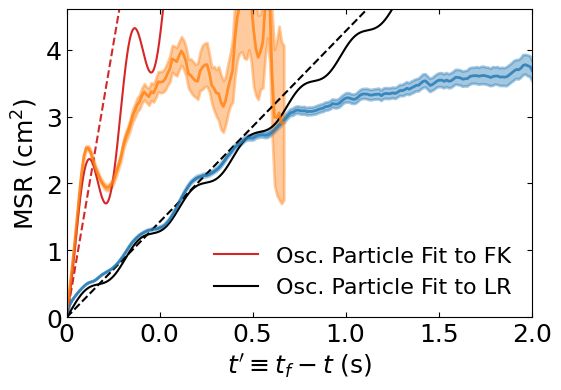

In [40]:
#extract xy values from full
x_values_fk=df_msr_fk['tdeath_avg'].values
y_values_fk=df_msr_fk['MSR'].values
yerr_values_fk=df_msr_fk['Delta_MSR'].values
x_values_lr=df_msr_lr['tdeath_avg'].values
y_values_lr=df_msr_lr['MSR'].values
yerr_values_lr=df_msr_lr['Delta_MSR'].values


#plot MSR_Osc over the direct simulation results
lw=2
alpha=0.4
# fontsize=16
fontsize=18
# # figsize=(8,4.2)
# figsize=(4,4.2)
figsize=(6,4)
# fontsize=15
### plot expected
# fontsize=20
tscale=1e-3

fig,ax=plt.subplots(figsize=(6,4))
#plot simulated annealing fits of oscillatory particle model
MSR_offset=dict_osc_fit_lr['MSR_offset']
phi_f = dict_osc_fit_lr['phase']
omega = dict_osc_fit_lr['omega']*1e3
a = dict_osc_fit_lr['a1']
D = dict_osc_fit_lr['a0']/2
t_values=np.linspace(0,1,1000)
# MSR_values_oscillatory=4*(a*t_values+(2*D/omega)*(np.sin(omega*t_values+phi_f))+constant
MSR_values_oscillatory=4*(2*D*t_values+(a/omega)*(np.sin(omega*t_values+phi_f)-np.sin(phi_f))) + MSR_offset
ax.plot(t_values,MSR_values_oscillatory,c='C3',
                label=r'Osc. Particle Fit to FK')
#                 label=r'$MSR_{Osc.}(a=a_{FK},\phi_f=-\frac{\pi}{2})$')
phi_f = dict_osc_fit_fk['phase']
omega = dict_osc_fit_fk['omega']*1e3
a = dict_osc_fit_fk['a1']
D = dict_osc_fit_fk['a0']/2
# t_values=np.linspace(0,1,1000)
MSR_offset=dict_osc_fit_fk['MSR_offset']
# MSR_values_oscillatory=4*(a*t_values+(2*D/omega)*(np.sin(omega*t_values+phi_f))+constant
MSR_values_oscillatory=4*(2*D*t_values+(a/omega)*(np.sin(omega*t_values+phi_f)-np.sin(phi_f)))+MSR_offset
ax.plot(t_values,MSR_values_oscillatory,c='k',#'C2',
                label=r'Osc. Particle Fit to LR')

#plot the linear particle model
amax_fk = 1.781
amax_lr = 10.147
ax.plot(t_values,4*amax_fk*t_values,c='k',linestyle='dashed')
ax.plot(t_values,4*amax_lr*t_values,c='C3',linestyle='dashed')
# ax.plot(t_values,4*amax_fk*t_values,c='C0',linestyle='dashed')
# ax.plot(t_values,4*amax_lr*t_values,c='C1',linestyle='dashed')

# #plot the direct simulation of the oscillatory particle model under these same parameter settings
# stepsize=2500
# plt.scatter(dict_fit_fk['tdeath'][::stepsize],dict_fit_fk['MSR'][::stepsize],lw=2,alpha=.7,c='k',#'C2',
#             marker='x')#,label='Simulation of Osc. (FK)')
# stepsize=1000
# plt.scatter(dict_fit_lr['tdeath'][::stepsize],dict_fit_lr['MSR'][::stepsize],lw=2,alpha=.7,c='C3',
#             marker='x')#,label='Simulation of Osc. (LR)')

#plot msd data from full
ax.plot(x_values_fk*tscale,y_values_fk,lw=2,alpha=0.8,c='C0')
ax.fill_between(x_values_fk*tscale,y_values_fk-yerr_values_fk,y_values_fk+yerr_values_fk,lw=lw,alpha=alpha,color='C0')
ax.plot(x_values_lr*tscale,y_values_lr,lw=2,alpha=0.8,c='C1')
ax.fill_between(x_values_lr*tscale,y_values_lr-yerr_values_lr,y_values_lr+yerr_values_lr,lw=lw,alpha=alpha,color='C1')

#format_plot
# format_plot(ax=ax,xlabel=r'$t_f-t$ (seconds)',ylabel=r'MSR (cm$^2$)',fontsize=fontsize)
format_plot(ax=ax,xlabel=r"$t'\equiv t_f-t$ (s)",ylabel=r'MSR (cm$^2$)',fontsize=fontsize)
ax.tick_params(bottom=True,left=True,top=True, right=True,direction='in',which='both')
ax.legend(fontsize=16,frameon=False)
xticklabels = [str(x) for x in ax.get_xticks()]
xticklabels[0] = '0'
ax.set_xticklabels(xticklabels)
plt.xlim([0,1])
plt.ylim([0,4.6])
# plt.ylim([0,5.1])
# plt.ylim([0,14.1])
plt.show()